In [817]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar as cal
import math
import scipy.stats as st
import random
import numpy as np


#CHAPTER 1 - EXPLORATORY DATA ANALYSIS

#1.3  Importing the data
dados = pd.read_csv(r"dados.csv",index_col='data', parse_dates=True, dayfirst=True)
dados.columns = ['barracao','pinhal','vazao']



#1.6  Transformation
#Esta seção se refere ao processamento inicial dos dados, como busca por erros, lidar com valores 
#especiais, converter os dados em diferentes formatos e realizar cálculos necessários.

#Através do Gráfico de Gantt, foi definido o maior período com menor número de falhas para 
#estação fluviométrica na UHE Barra Grande (70840080) no Rio Pelotas.
date_start = pd.to_datetime('01/01/1995', dayfirst=True)
date_end = pd.to_datetime('29/10/2014', dayfirst=True)
Dados = dados.loc[date_start:date_end]

# Cálculo das Médias Mensais
group = Dados.groupby(pd.Grouper(freq='M'))
serie_data = []
vazao_med = []
chuva_med = []
for g in group: 
    serie_data.append(g[0].year)
    vazao_med.append(g[1].vazao.values.mean())
    chuva_med.append(g[1].pinhal.values.mean())

serie = pd.DataFrame(serie_data)
serie['Q'] = vazao_med
serie['P'] = chuva_med
serie.columns = ['Data','Q','P']
serie.index = serie.Data
del serie['Data']


Número de Classes do Histograma de Vazão: 10


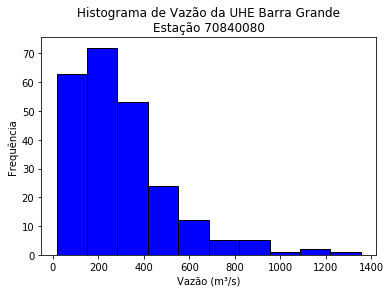

Número de Classes do Histograma de Precipitação: 10


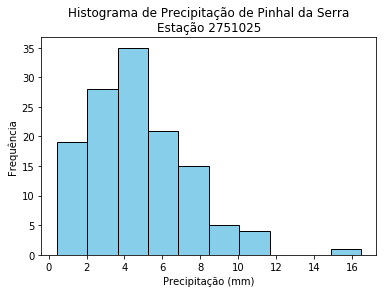

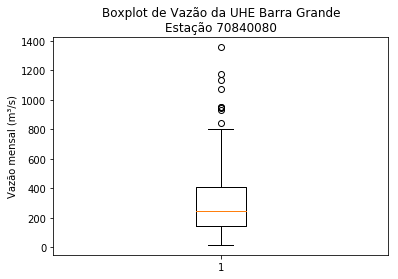

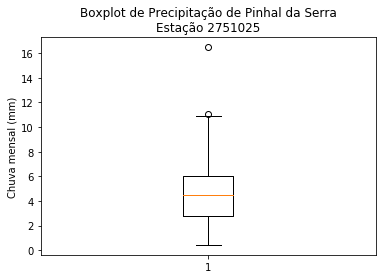

In [818]:
#CHAPTER 2 - DISTRIBUTIONS

#2.1  Histograms
#Histrogramas representam a distribuição de uma variável. 
#Demonstram quantas vezes um valor ou uma faixa de valores (classe) aparece.
#O número de classes foi calculado com base na fórmula de Sturges k = 1 + 3.3×log(n), onde n é o tamanho da série.

#Histograma da vazão
n_q = len(serie['Q'])
k_q = round(1 + 3.3*math.log10(n_q),0)+1
print("Número de Classes do Histograma de Vazão:",int(k_q))
plt.hist(serie['Q'], bins=int(k_q), color='blue', edgecolor='black')
plt.ylabel("Frequência")
plt.xlabel("Vazão (m³/s)")
plt.title("Histograma de Vazão da UHE Barra Grande\nEstação 70840080")
plt.show()
#Histograma da precipitação
n_p = len(serie['P'])
k_p = round(1 + 3.3*math.log10(n_q),0)+1
print("Número de Classes do Histograma de Precipitação:",int(k_p))
plt.hist(serie['P'], bins=int(k_p), color='skyblue', edgecolor='black')
plt.ylabel("Frequência")
plt.xlabel("Precipitação (mm)")
plt.title("Histograma de Precipitação de Pinhal da Serra\nEstação 2751025")
plt.show()


#2.5  Outliers
#Para analisar a existência de outliers, serão utilizados boxplots ou gráficos de caixa.
#BOXPLOT para Vazão
plt.boxplot(serie['Q'])
plt.ylabel("Vazão mensal (m³/s)")
plt.title("Boxplot de Vazão da UHE Barra Grande\nEstação 70840080")
plt.show()
#BOXPLOT para Precipitação
plt.boxplot(serie['P'].dropna())
plt.ylabel("Chuva mensal (mm)")
plt.title("Boxplot de Precipitação de Pinhal da Serra\nEstação 2751025")
plt.show()

In [819]:
#2.7  Summarizing distributions
#Esta seção se refere ao entendimento de características da distribuição, como tendência central, variabilidade,outliers, etc.

#Média
print("Média da série de Vazão mensal:",round(serie['Q'].mean(),1),"m³/s\n")
print("Média da série de Precipitação mensal:",round(serie['P'].mean(),1),"mm\n\n")

#Desvio Padrão
print("Desvio Padrão da série de Vazão mensal:",round(serie['Q'].std(),1),"m³/s\n")
print("Desvio Padrão da série de Precipitação mensal:",round(serie['P'].std(),1),"mm\n\n")

#Variância
print("Variância da série de Vazão mensal:",round(serie['Q'].var(),1),"(m³/s)²\n")
print("Variância da série de Precipitação mensal:",round(serie['P'].var(),1),"mm²\n\n")

#Mediana
print("Mediana da série de vazão mensal:",round(serie['Q'].median(),1),"m³/s\n")
print("Mediana da série de vazão principal:",round(serie['P'].median(),1),"mm\n\n")

Média da série de Vazão mensal: 300.4 m³/s

Média da série de Precipitação mensal: 4.7 mm


Desvio Padrão da série de Vazão mensal: 223.9 m³/s

Desvio Padrão da série de Precipitação mensal: 2.6 mm


Variância da série de Vazão mensal: 50148.5 (m³/s)²

Variância da série de Precipitação mensal: 6.7 mm²


Mediana da série de vazão mensal: 246.2 m³/s

Mediana da série de vazão principal: 4.5 mm




Text(0.5, 1.0, 'PMF da distribuição de vazão')

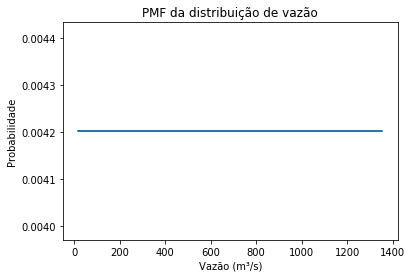

In [820]:
#3.1  Probability Mass Function (PMF)
#A PMF expressa a probabilidade de cada valor de ocorrer
#Para chegar a PMF, basta normalizar as frequências, isto é, dividir pelo tamanho da série.
pmf = pd.DataFrame(serie['Q'].value_counts()/len(serie['Q']))
pmf['P'] = serie['P'].value_counts()/len(serie['Q'])
pmf.columns = ['Q','P']

plt.plot(serie['Q'],pmf['Q'])
plt.ylabel("Probabilidade")
plt.xlabel("Vazão (m³/s)")
plt.title("PMF da distribuição de vazão")

#Desta forma, todos os valores aparecem apenas uma vez na distribuição

Text(0.5, 1.0, 'Diferença de Precipitação acumulada mensal entre as estações\nPinhal da Serra e Barracão')

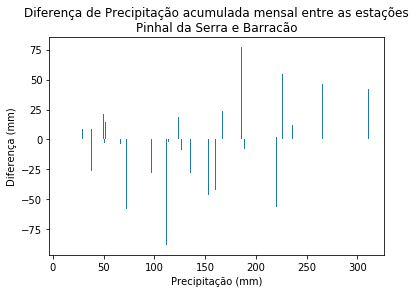

In [821]:
#3.3  Other visualizations
#Para plotar o gráfico de diferenças, será comparado o acumulado mensal de precipitação 
#entre duas estações (Barracão e Pinhal da Serra) para um período sem falhas entre as duas.
# Período: 2003-09-11 a 2006-04-30

Ds = pd.to_datetime('11/09/2003', dayfirst=True)
De = pd.to_datetime('30/04/2006', dayfirst=True)
othervis = dados.loc[Ds:De]
group = othervis.groupby(pd.Grouper(freq='M'))
serie_data2 = []
barracao = []
pinhal = []
for g in group: 
    serie_data2.append(g[0].year)
    barracao.append(round(g[1].barracao.values.sum(),0))
    pinhal.append(round(g[1].pinhal.values.sum(),0))

serie2 = pd.DataFrame(serie_data2)
serie2['B'] = barracao
serie2['P'] = pinhal
serie2.columns = ['Data','B','P']
serie2.index = serie2.Data
del serie2['Data']

diff_B = serie2['B']
diff_P = serie2['P']

diffs = []
rang=[]
for p in range(len(serie2['P'])):
    rang.append(serie2['P'].iloc[p])
    p1 = diff_P.iloc[p]
    p2 = diff_B.iloc[p]
        
    diffs.append(p1-p2)

plt.bar(rang,diffs)
plt.ylabel("Diferença (mm)")
plt.xlabel("Precipitação (mm)")
plt.title("Diferença de Precipitação acumulada mensal entre as estações\nPinhal da Serra e Barracão")


    

In [822]:
#Desta forma, pode-se concluir que há uma variação de até 75 mm entre as estações. 
# A estação pluviométrica Barracão apresenta valores acumulados mensais maiores até 175 mm aproximadamente.
# Já a estação Pinhal da Serra apresenta acumulados mensais maiores para chuvas a partir de 175 mm, aproximadamente
# Entre os anos de 2003 e 2006

58.5 %
365.8733333333333 m³/s


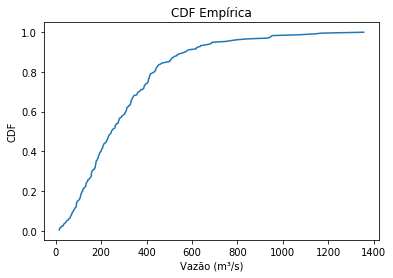

In [864]:
#  CHAPTER 4  CUMULATIVE DISTRIBUTION FUNCTIONS

def PercentilRank(serie, q):
    #serie: série temporal de vazão
    #valor: um valor qualquer de vazão
    serie = pd.DataFrame(serie)
    serie.columns=['col']
    serie = serie.sort_values(by='col')    

    c=0
    count=0
    countf=0
    
    #Valor antes do investigado
    for qi in serie['col']:
        if qi <= q:
            count+=1
            c = c+1
            Qi=qi
        else:
            break
       
    qf=serie['col'].iloc[c+1]
    
    #valor após o investigado
    for i in range(c+1):
        if serie['col'].iloc[i] <= qf:
            countf+=1
        else:
            break
   
    ri = 100*count/len(serie['col'])
    rf = 100*countf/len(serie['col'])
    r = ri + ((q-Qi)*(rf-ri))/(qf-Qi)
    return r
    

def Percentil(serie_dados,percentilrank):  

#    PercentilRank: Valor em porcentagem
    serie_dados = pd.Series(serie_dados)
    serie_dados = serie_dados.sort_values()
    X=[]
    Xs=[]
    Xi=[]
    p=[]
    
    li=None
    ls=None
    for i in serie_dados:
        count=0
        for qi in serie_dados:
            if qi <= i:
                count = count+1
            percentil_rank = round(100*(count/len(serie_dados)),3)

        if (percentil_rank - percentilrank) <= 1:
            if (percentil_rank - percentilrank) > 0:
                ls = percentil_rank
                Xs=i
                if li != None:
                    X.append( Xi + ((percentilrank - li) * (Xs - Xi)) / (ls-li) )
                    p.append(ls-percentilrank)

        if (percentilrank - percentil_rank) <= 1:
            if (percentilrank - percentil_rank) > 0:
                li = percentil_rank
                Xi = i
                if ls != None:
                    X.append( Xi + ((percentilrank - li) * (Xs - Xi)) / (ls-li) )
                    p.append(percentilrank-li)

    df = pd.DataFrame(X)
    df.columns=['X']
    df['p']=p
    df.columns=['X','p']    
    for i in range(len(df['p'])):
        if df['p'].iloc[i] == df['p'].min():
            resposta = df['X'].iloc[i]
    return resposta




#4.2  Percentiles
#Percentile Rank: Fração que representa um score menor ou igual a um determinado valor
# Ex.: Qual o Percentil rank para a vazão média mensal igual a 300 m³/s?
PR300 = round(PercentilRank(serie['Q'], 300),1)

print(PR300,"%")
#Ou seja, 58,4% dos dados são menores ou iguais a 300 m³/s

#O Percentil é o valor relacionado ao rank. 
#Desta forma, o percentil de 70% é 367.4 m³/s
print(Percentil(serie['Q'],70),'m³/s')



#4.3  CDFs
#  É uma função que descreve o rank percentil de cada valor.
def CDF(serie):
    serie = pd.Series(serie)
    serie = serie.sort_values()
    aux = []
    aux_ind = []
    for p in serie:
        count=0
        for rank in serie:
            if rank <= p:
                count+=1
        aux.append(count/len(serie))
        aux_ind.append(p)        
    return aux, aux_ind

[cdf,indice] = CDF(serie['Q'])
cdf = pd.DataFrame(cdf)
cdf.index = indice
cdf.columns = ['CDF']
cdf = cdf.sort_values(by='CDF')
plt.plot(cdf.index,cdf['CDF'])
plt.xlabel('Vazão (m³/s)')
plt.ylabel('CDF')
plt.title("CDF Empírica")
plt.show()

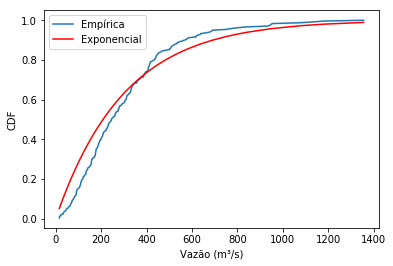

In [824]:
#CHAPTER 5 – MODELING DISTRIBUTIONS

#Distribuições Empíricas: baseadas em observações empíricas
#Distribuição Analítica: Baseada na CDF ou Função matemática
#Modelo: Simplificação de uma distribuição que desconsidera certos detalhes próprios das amostras, como erro de medição e idiossincrasias. Por isso mesmo, nenhum modelo é perfeito, isto é, os dados reais nunca se adaptam integralmente a uma distribuição. Ainda assim, o que é útil ou desnecessário, depende do objetivo de uso do modelo. 
#Neste capítulo, o ajuste das distribuições será avaliado atravé da comparação visual com a CDF.

#5.1  The exponential distribution

CDF_exp=[]
X =[]


for i in range(len(serie['Q'])):
    CDF_exp.append( 1 - math.exp( -(1/serie['Q'].mean()) * serie['Q'].iloc[i]) )
    X.append( serie['Q'].iloc[i] )

CDF_exp = pd.DataFrame(CDF_exp)

CDF_exp['Q'] = X
CDF_exp.columns=['CDF','Q']
CDF_exp = CDF_exp.sort_values(by='Q')

plt.plot(cdf)
plt.plot(CDF_exp['Q'], CDF_exp['CDF'],color='red')
plt.xlabel('Vazão (m³/s)')
plt.ylabel('CDF')
plt.legend(['Empírica', 'Exponencial'])
plt.show()

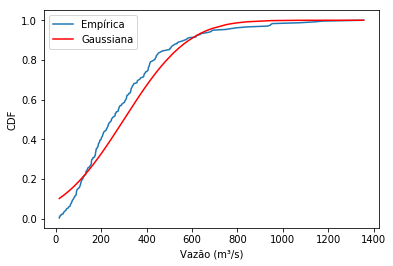

In [825]:
#5.2  The normal distribution

CDF_norm = st.norm.cdf( serie['Q'], loc=serie['Q'].mean() , scale=serie['Q'].std() )
CDF_norm = pd.DataFrame(CDF_norm)
CDF_norm.columns=['CDF']
x = serie['Q'].sort_values()

CDF_norm = CDF_norm['CDF'].sort_values()

plt.plot(cdf)
plt.plot(x,CDF_norm, color='red')
plt.legend(['Empírica', 'Gaussiana'])
plt.xlabel('Vazão (m³/s)')
plt.ylabel('CDF')
plt.show()


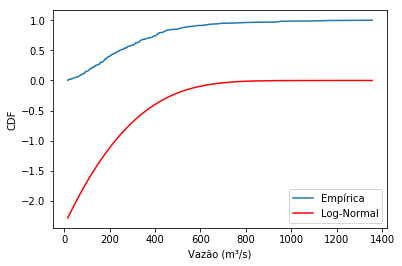

In [826]:
#5.4  The lognormal distribution
LOGCDF_norm = []
for i in range(len(serie['Q'])):
    LOGCDF_norm.append(st.norm.logcdf(serie['Q'].iloc[i], loc=serie['Q'].mean() , scale=serie['Q'].std() )) 
LOGCDF_norm = pd.DataFrame(LOGCDF_norm)
LOGCDF_norm.columns=['CDF']
LOGCDF_norm = LOGCDF_norm['CDF'].sort_values()

plt.plot(cdf)
plt.plot(x,LOGCDF_norm, color='red')
plt.legend(['Empírica', 'Log-Normal'])
plt.xlabel('Vazão (m³/s)')
plt.ylabel('CDF')
plt.show()

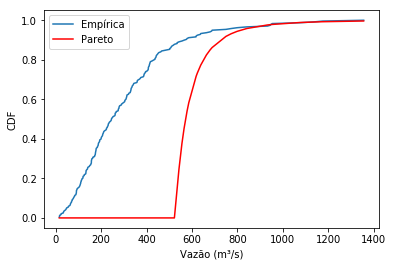

In [827]:
#5.5  The Pareto distribution
b = 3.6 #Valor assumido ateavés de tentativa e erro
CDF_pareto = st.pareto.cdf( serie['Q'],b , loc=serie['Q'].mean() , scale=serie['Q'].std() )
CDF_pareto = pd.DataFrame(CDF_pareto)
CDF_pareto.columns=['CDF']
CDF_pareto = CDF_pareto['CDF'].sort_values()

plt.plot(cdf)
plt.plot(x,CDF_pareto, color='red')
plt.legend(['Empírica', 'Pareto'])
plt.xlabel('Vazão (m³/s)')
plt.ylabel('CDF')
plt.show()
del x

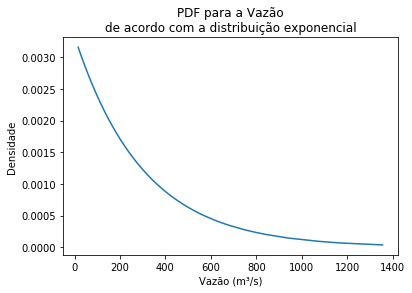

In [828]:
#CHAPTER 6  PROBABILITY DENSITY FUNCTIONS
#  A PDF é a Derivada da CDF
# A densidade de probabilidade descreve a probabilidade por unidade de x, de modo que pra se obter a probabilidade de x
# é necessário integrar a PDF até x.

#  PDF da função exponencial
L = 1/serie['Q'].mean()
x =[]
PDF_exp = []
for i in range (len(serie['Q'])):
    PDF_exp.append( L * math.exp( -L * serie['Q'].iloc[i] ) )
    x.append(serie['Q'].iloc[i])
PDF_exp = pd.DataFrame(PDF_exp)
PDF_exp['x'] = x
PDF_exp.columns = ['PDF','x']
PDF_exp = PDF_exp.sort_values(by='PDF')

plt.plot(PDF_exp['x'], PDF_exp['PDF'])
plt.title("PDF para a Vazão\nde acordo com a distribuição exponencial")
plt.xlabel('Vazão (m³/s)')
plt.ylabel('Densidade')
plt.show()

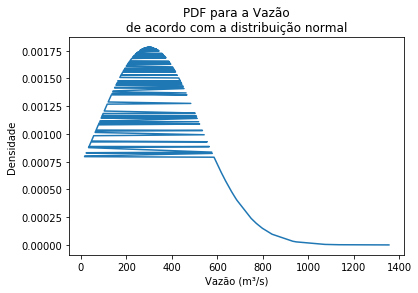

In [829]:
#  PDF da função normal
PDF_norm = []
x =[]
for i in range (len(serie['Q'])):   
    PDF_norm.append( (1/( serie['Q'].std() * math.sqrt(2 * math.pi)))  * math.exp( (-1/2) * ((serie['Q'].iloc[i] - serie['Q'].mean())/serie['Q'].std())**2 ) )
    x.append(serie['Q'].iloc[i])
PDF_norm = pd.DataFrame(PDF_norm)
PDF_norm['x'] = x
PDF_norm.columns = ['PDF','x']
PDF_norm = PDF_norm.sort_values(by='PDF')

plt.plot(PDF_norm['x'], PDF_norm['PDF'])
plt.title("PDF para a Vazão\nde acordo com a distribuição normal")
plt.xlabel('Vazão (m³/s)')
plt.ylabel('Densidade')
plt.show()

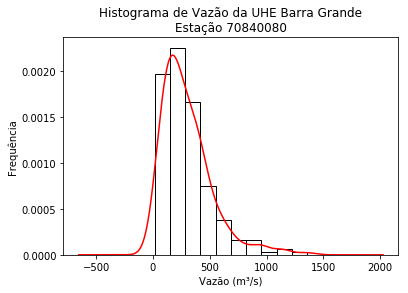

In [830]:
#6.2  Kernel density estimation (KDE)
#O KDE é um algoritmo que pega uma amostra e encontra uma PDF suavizada que se ajusta aos dados
#A função hist apresenta o método density, que expressa a distribuição em função da densidade, e 
#O Pandas tem um método para KDE.
plt.hist(serie['Q'], bins=int(k_q), density=True, color='white', edgecolor='black')
serie['Q'].plot.kde(color='red')
plt.ylabel("Frequência")
plt.xlabel("Vazão (m³/s)")
plt.title("Histograma de Vazão da UHE Barra Grande\nEstação 70840080")
plt.show()

In [831]:
#6.7  Moments

def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)


#Para k=1, temos a média da amostra.
Mk1 = RawMoment(serie['Q'],1)
print('serie.Q.mean()=',serie['Q'].mean())
print('Mk1=',Mk1)

#Os demais momentos não representam muito por eles mesmos, embora sejam utilizados em outros cálculos
#Para k=2 do momento central, temos a variância. 
Var = CentralMoment(serie['Q'],2)

print('\nserie.Q.var()=',serie['Q'].var())
print('Var=',Var)

std = math.sqrt(Var)
print('\nserie.Q.std()=',serie['Q'].std())
print('Std=',std)

serie.Q.mean()= 300.3733947691422
Mk1= 300.3733947691422

serie.Q.var()= 50148.51450912263
Var= 49937.806464966656

serie.Q.std()= 223.93864005374917
Std= 223.46768550501133


In [832]:
#6.8  Skewness
#Skewness é uma propriedade que descreve a forma da distribuição. 
#Se ela é simétrica ao redor da sua tendência central, skewness é zero
#Se há uma calda pra direita, isto é, se os valores se extendem para a direita, skewness é positivo.  
#Se houver uma calda para a esquerda, skewness é negativo.
#O pandas tem um método chamado skew, que será utilizado para comparar com o apresentado no Thinkstats calculado através 
#da teoria dos momentos.

def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = math.sqrt(var)
    return CentralMoment(xs, k) / std**k

def Skewness(xs):
    return StandardizedMoment(xs, 3)

Skew = Skewness(serie['Q'])
print('serie.Q.skew()=',serie['Q'].skew())
print('Skew=',Skew)

serie.Q.skew()= 1.6583292877341629
Skew= 1.6478592808445585


Text(0.5, 1.0, 'Gráfico de Dispersão\nPrecipitação x Vazão')

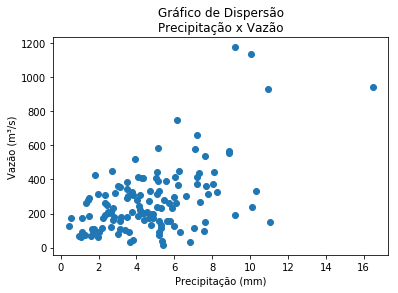

In [833]:
#CHAPTER 7  RELATIONSHIPS BETWEEN VARIABLES
#7.1  Scatter plots
#Uma maneira adequada de enxergar a relação entre duas variáveis é um gráfico onde
#cada eixo representa uma variável, conhecido como Scatter Plot ou Gráfico de Dispersão.
plt.scatter(serie['P'],serie['Q'])
plt.xlabel('Precipitação (mm)')
plt.ylabel('Vazão (m³/s)')
plt.title('Gráfico de Dispersão\nPrecipitação x Vazão')

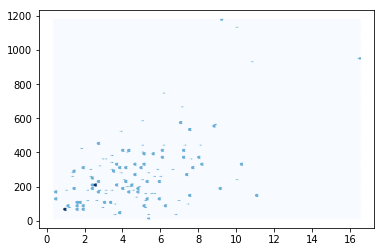

In [834]:
#Uma maneira de se observar a localização da densidade da relação é através da transparência.
#A visibilidade no gráfico é proporcional à densidade, isto é, nos pontos mais escuros a densidade é maior.
#A biblioteca matplotlib tem o método HEXBIN para representar isto.
#Colormaps em https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.hexbin(serie['P'],serie['Q'], cmap='Blues')

In [835]:
#7.3  Correlation
#A correlação é uma estimativa da força da relação entre duas variáveis. Dos diversos
#métodos existentes, o livro aborda 2: Pearson e Spearman.
    
#Pearson product-moment correlation coeficiente: Cada valor é transformado em um
#score padronizado, assumindo valores de -1 a 1.

#Spearman rank correlation coeficiente: cada valor é transformado no seu rank em
#uma lista ordenada. Na prática, o coeficiente de Pearson é calculado a partir dos ranks.
#Uma boa alternativa para mitigar o efeito de outliers e de distribuições distorcidas.

Corr_p = serie.corr(method='pearson')
Corr_s = serie.corr(method='spearman')
print('Pearson\n',Corr_p)
print('\nSpearman\n',Corr_s)

Pearson
           Q         P
Q  1.000000  0.538155
P  0.538155  1.000000

Spearman
           Q         P
Q  1.000000  0.394828
P  0.394828  1.000000


In [836]:
#7.4  Covariance

#A covariância é uma medida que indica a inter-dependência entre duas variáveis; como
#elas se comportam em relação a sua média.
#Covariância negativa e valor absoluto alto indica que uma variável é pequena quando a
#outra é grande.

#Covariância alta e positiva indica que uma variável é grande quando a outra é grande.
#O pandas tem o método cov()
Cov = serie.cov()
print('Covariância\n',Cov)

Covariância
               Q           P
Q  50148.514509  279.116831
P    279.116831    6.720009


In [837]:
#7.6  Nonlinear relationships
#Valores próximos a 0 na correlação de Pearson podem indicar que as variáveis não
#estão relacionadas, mas isso pode ser um erro pois a correlação de Pearson mede
#apenas a correlação linear.
#Portanto, sempre se deve observar o gráfico de dispersão além dos coeficientes de
#correlação e covariância.

#7.8  Correlation and causation
#Embora correlação seja capaz de explica se duas variáveis são relacionadas, não o é
#para inferir se uma causa a outra. As soluções para isso são Tempo e Aleatoriedade.
#No quesito tempo, tentar observar quem aparece antes. Provavelmente esta causa a
#outra.
#No quesito aleatoriedade, pequenos grupos e calcular a média. Este valor deve ser
#parecido.
#Estas ideias norteam o teste controlado aleatório, em que um um grupo é submetido a
#uma intervenção e o grupo de controle não recebe para observar o comportamento dos
#grupos.

Ano Hidrológico: APR a MAR
Média: 2997.29


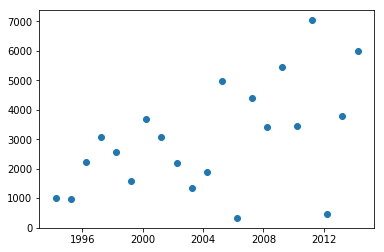

In [838]:
#CHAPTER 8 - ESTIMATION
#A Estimativa de parâmetros de uma população a partir de uma amostra de observações pode
#ser englobada nos métodos da Inferência Estatística.Estimar é calcular os parâmetros de 
#uma amostra e assumir que estes são os mesmos para a população.

#Dentre os métodos clássicos da inferência estatística, existem dois caminhos possíveis para se
#obter estimativas de parâmetros: a estimação pontual e a estimação por intervalos.

#A estimação pontual refere-se à atribuição de um único valor numérico a um certo parâmetro
#populacional, a partir de estatísticas amostrais.

#A estimação por intervalos utiliza as informações contidas na amostra, para estabelecer uma
#afirmação quanto à probabilidade, ou grau de confiança, com que um certo intervalo de valores
#irá conter o verdadeiro valor do parâmetro populacional.

#Estimador (θ)
#É uma variável aleatória, cujas propriedades podem ser estudadas pela teoria de probabilidades.

#Para fazer com que uma amostragem independente de precipitação seja realizada, 
#então será preciso determinar o ano hidrológico e os dados serão máximas mensais, 
#considerando o ano hidrológico. O ano hidrológico é definido de modo que a estação d
#e enchente não seja separada pelo fim do ano.

media_mensal=[]
for i in range(1,13):
    media_mensal.append(Dados['vazao'].loc[Dados.index.month==i].mean())
inicio_Ano_Hidrologico = media_mensal.index(min(media_mensal)) + 1
mes_incio_AH = cal.month_abbr[inicio_Ano_Hidrologico].upper()
mes_fim_AH = cal.month_abbr[inicio_Ano_Hidrologico-1].upper()
print("Ano Hidrológico:",mes_incio_AH, "a",mes_fim_AH)

# Cálculo doss Máximos Mensais
group3 = Dados.groupby(pd.Grouper(freq='AS-%s'%mes_incio_AH))
serie_data2 = []
vazao_max = []
for g in group3: 
    serie_data2.append(g[0])
    vazao_max.append(g[1].vazao.values.max())

serie3 = pd.DataFrame(serie_data2)
serie3['Q'] = vazao_max
serie3.columns = ['Data','Q']
serie3.index = serie3.Data
del serie3['Data']
plt.scatter(serie3.index, serie3['Q'])
print('Média:',round(serie3['Q'].mean(),2))

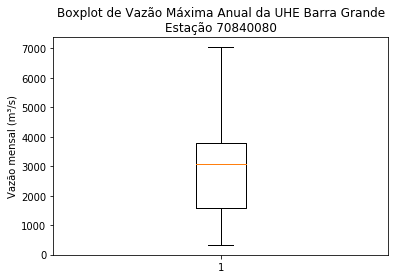

In [839]:
#Caso haja outliers, eles deveriam ser descartados para que a estimativa fosse realizada 
#ou seria recomendado utilizar a mediana como estimador.

plt.boxplot(serie3['Q'])
plt.ylabel("Vazão mensal (m³/s)")
plt.title("Boxplot de Vazão Máxima Anual da UHE Barra Grande\nEstação 70840080")
plt.show()

In [840]:
#Como não há outliers, a média amostral minimiza o valor do mean squared error (MSE). 

def RMSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return math.sqrt(mse)

def Estimate(na, m, mu, sigma):
    #na: Tamanho da amostra
    #m: Número de amostragens
    #mu: média
    #sigma: Desvio Padrão
    
    means = []
    medians = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(na)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)
    print('Média θ:',np.mean(means))
    print('rmse da media amostral:', RMSE(means, mu))
    print('rmse da mediana amostral:', RMSE(medians, mu))
    
Estimate(15,10000,serie3['Q'].mean(),serie3['Q'].std())

Média θ: 2994.5072945119655
rmse da media amostral: 472.22418808877364
rmse da mediana amostral: 584.336617358615


In [841]:
#8.2  Guess the variance
#Para amostragens grandes, a variância é um estimador adequado. Entretanto, para amostragens pequenas, 
#ela tende a ser muito pequena. Devido a este fato, ela é considerada enviesada.

#Erro de amostragem: Variação na estimativa devido à amostragem aleatória.
def MeanError(estimates, actual):
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

def Estimate2(na, m, mu, sigma):
    estimates1 = []
    estimates2 = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(na)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))

#O parâmetro ddof=1 representa o uso de n-1 como denominador, de acordo com a fórmula a seguir.

Estimate2(15,10000,serie3['Q'].mean(),serie3['Q'].std())

mean error biased -214734.90951594457
mean error unbiased 12333.298817644352


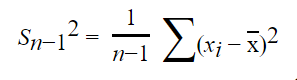

limite inferior ci: 2162.2130713721426
limite superior cf: 3759.067936931244


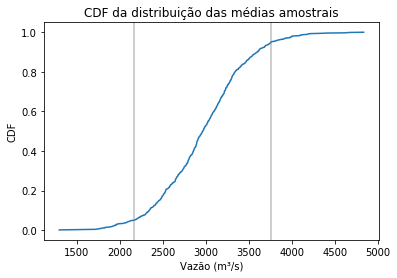

In [868]:
#8.3  Sampling distributions

def SimulateSample(mu, sigma, n, m):
    means = []
    for j in range(m):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        means.append(xbar)   
    [cdf,indice] = CDF(means)
    
    cdf = pd.DataFrame(cdf)
    cdf.index = indice
    del indice
    
    plt.plot(cdf)
    
    ci = Percentil(means,5)
    print('limite inferior ci:',ci)
    plt.axvline(x=ci,color='grey',alpha=0.5)
    cf = Percentil(means,95)
    print('limite superior cf:',cf)
    plt.axvline(x=cf,color='grey',alpha=0.5)
    stderr = RMSE(means, mu)
    plt.title('CDF da distribuição das médias amostrais')
    plt.ylabel('CDF')
    plt.xlabel('Vazão (m³/s)')

SimulateSample(serie3['Q'].mean(),serie3['Q'].std(),15, 1000)

In [677]:
# 8.5  Exponential distributions
#A média e mediana utilizadas acima foram considerando uma distribuição normal. O mesmo se aplica à 
#distribuição exponencial. Sendo L o estimador de λ (Média da distribuição exponencial 1/ λ), ele será 
#1/x ̅ ou igual a ln(2)/m, para média ou mediana amostral respectivamente.  
#Os procedimentos realizados para averiguar qual se comporta melhor (RMSE da média e da mediana) e o 
#cálculo da confiabilidade (CI) podem ser igualmente utilizados para a distribuição exponencial. 



In [ ]:
#Chapter 9  Hypothesis testing

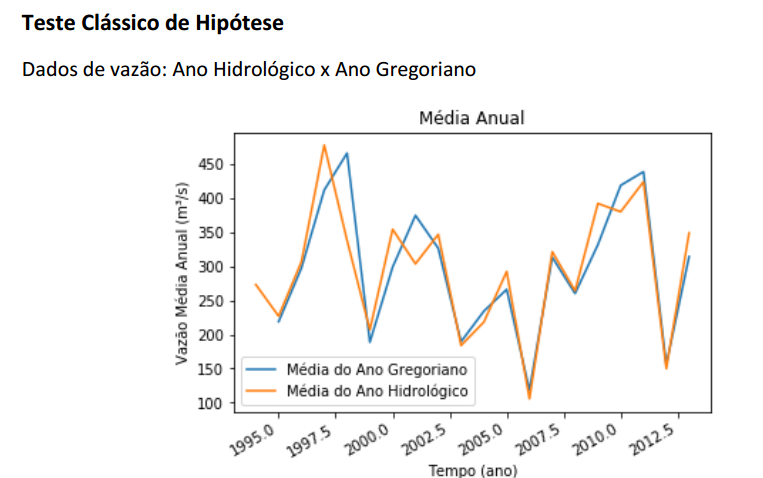

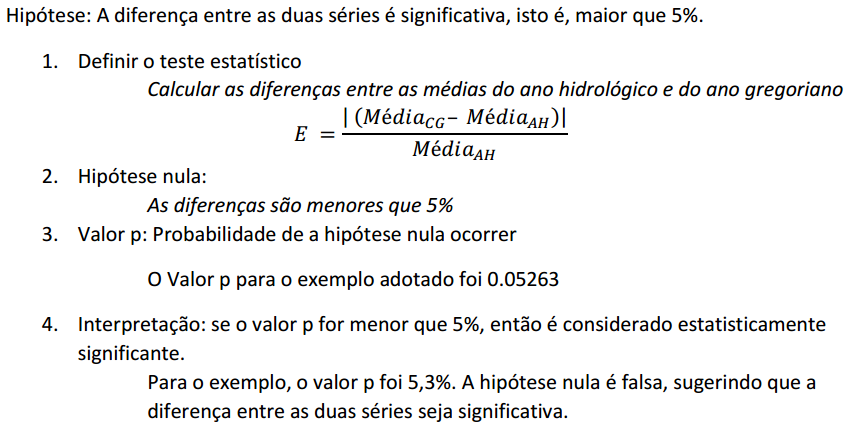

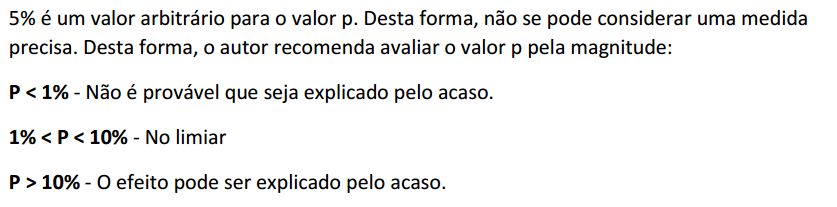

In [876]:
#CHAPTER 11 - REGRESSION
#Regressão Simples: Quando tem só uma variável explicativa e uma variável dependente.
#Regressão Múltipla: Quando há mais de uma variável explicativa.

#Regressão simples

#Análise através do Pacote StatsModels
#  11.1  StatsModels

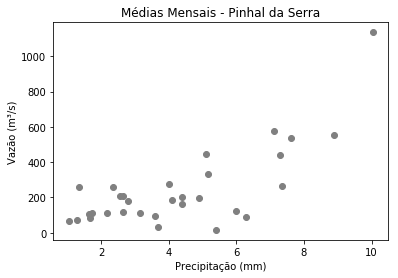

REGRESSÃO LINEAR SIMPLES PARA PRECIPITAÇÃO E VAZÃO

                             OLS Regression Results                            
Dep. Variable:                      Q   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     32.83
Date:                Fri, 12 Jul 2019   Prob (F-statistic):           3.35e-06
Time:                        00:24:54   Log-Likelihood:                -199.72
No. Observations:                  31   AIC:                             403.4
Df Residuals:                      29   BIC:                             406.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [886]:
group = Dados2.groupby(pd.Grouper(freq='M'))


# CÁLCULO DAS MÉDIAS MENSAIS DA ESTAÇÃO PINHAL DA SERRA
cont=0
serie = []
VazaoMediaMensal = []
ChuvaMediaMensal = []
for g in group: 
    serie.append(pd.to_datetime(g[0]))
    VazaoMediaMensal.append(g[1].vazao.values.mean())
    ChuvaMediaMensal.append(g[1].pinhal.values.mean())
    cont = cont+1
    
pinhal = pd.DataFrame(serie)
pinhal['P'] = ChuvaMediaMensal
pinhal['Q'] = VazaoMediaMensal


pinhal.columns = ['Data','P','Q']
pinhal.index = pinhal.Data
del pinhal['Data']

plt.scatter(pinhal.P,pinhal.Q,color='grey')
plt.xlabel('Precipitação (mm)')
plt.ylabel('Vazão (m³/s)')
plt.title('Médias Mensais - Pinhal da Serra')
plt.show()

import statsmodels.formula.api as smf

formula = 'Q ~ P'
model = smf.ols(formula,data=pinhal)
results = model.fit()
inter = results.params['Intercept']
slope = results.params['P']
slope_pvalue = results.pvalues['P']
R2 = results.rsquared
print('REGRESSÃO LINEAR SIMPLES PARA PRECIPITAÇÃO E VAZÃO\n\n',results.summary())

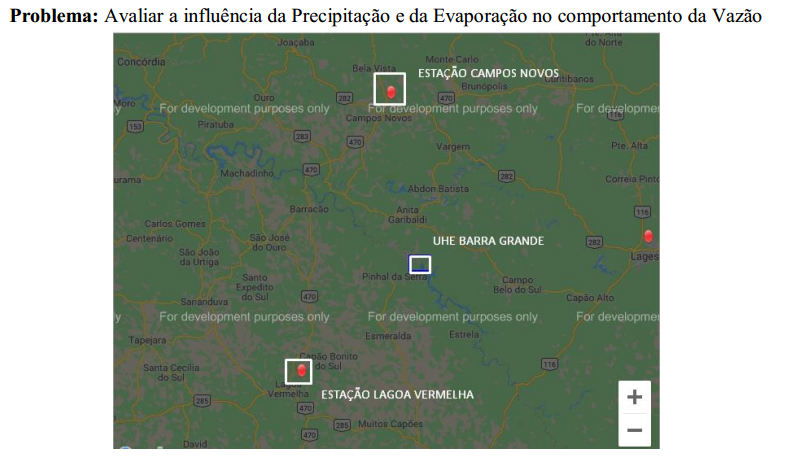

In [887]:
#  11.2  Multiple regression

LagoaVermelha = pd.read_csv(r'Evapo_LagoaVermelha.csv',sep=';',index_col='Data', parse_dates=True,dayfirst=True)
CamposNovos = pd.read_csv(r'Evapo_CamposNovos.csv',sep=';',index_col='Data', parse_dates=True,dayfirst=True)
tCN = pd.read_csv(r'Temp_CamposNovos.csv',sep=';',index_col='Data', parse_dates=True,dayfirst=True)
tLV = pd.read_csv(r'Temp_LagoaVermelha.csv',sep=';',index_col='Data', parse_dates=True,dayfirst=True)

date_sart_2 = pd.to_datetime('01/10/2003',dayfirst=True)
date_end_2 = pd.to_datetime('30/04/2006',dayfirst=True)
Dados2 = dados.loc[date_sart_2:date_end_2]


LagoaVermelha = LagoaVermelha.loc[date_sart_2:date_end_2]
CamposNovos = CamposNovos.loc[date_sart_2:date_end_2]
Evaporacao = (LagoaVermelha['Evaporacao']+CamposNovos['Evaporacao'])/2
Temp_CN = tCN[date_sart_2:date_end_2]
Temp_LV = tLV[date_sart_2:date_end_2]
Temperatura = ( Temp_CN['TempMaxima'] + Temp_LV['TempMaxima'] )/2

group2 = Evaporacao.groupby(pd.Grouper(freq='M'))
group3 = Temperatura.groupby(pd.Grouper(freq='M'))

EvaporacaoMediaMensal = []
data=[]
for g2 in group2:
    data.append(pd.to_datetime(g2[0]))
    EvaporacaoMediaMensal.append(g2[1].values.mean())

TemperaturaMediaMensal = []
data=[]
for g3 in group3:
    data.append(pd.to_datetime(g3[0]))
    TemperaturaMediaMensal.append(g3[1].values.mean())

pinhal['E'] = EvaporacaoMediaMensal
pinhal['Tmax'] = TemperaturaMediaMensal   
pinhal.columns = ['P','Q','E','Tmax']


formula = 'Q ~ P + E'
model = smf.ols(formula,data=pinhal)
results = model.fit()
print('REGRESSÃO LINEAR SIMPLES PARA PRECIPITAÇÃO, EVAPORAÇÃO E VAZÃO\n\n',results.summary())


REGRESSÃO LINEAR SIMPLES PARA PRECIPITAÇÃO, EVAPORAÇÃO E VAZÃO

                             OLS Regression Results                            
Dep. Variable:                      Q   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     16.48
Date:                Fri, 12 Jul 2019   Prob (F-statistic):           1.86e-05
Time:                        00:25:03   Log-Likelihood:                -199.40
No. Observations:                  31   AIC:                             404.8
Df Residuals:                      28   BIC:                             409.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [889]:
#De acordo com o valor p, a precipitação é uma variável estatisticamente significante para a
#vazão. Entretanto, a relação entre evaporação e vazão pode ser explicada pelo acaso.
#O valor do R² teve uma alteração muito pequena, o que indica que a associação entre as duas
#variáveis com a vazão resulta em uma melhoria na regressão, mas praticamente insignificante.


#11.3  Nonlinear relationships

#relação pode ser não linear. Para compreender melhor o comportamento da relação entre as
#variáveis, adicionar a variável independente ao quadrado.
#Desta forma, a vazão, variável dependente, estará sendo relacionada às variáveis independentes
#Precipitação, Evaporação e Precipitação².

pinhal['P2'] = pinhal.P**2
formula = 'Q ~ P + P2'
model = smf.ols(formula,data=pinhal)
results = model.fit()
print('REGRESSÃO LINEAR SIMPLES PARA PRECIPITAÇÃO, PRECIPITAÇÃO² E VAZÃO\n\n',results.summary())

REGRESSÃO LINEAR SIMPLES PARA PRECIPITAÇÃO, PRECIPITAÇÃO² E VAZÃO

                             OLS Regression Results                            
Dep. Variable:                      Q   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     37.76
Date:                Fri, 12 Jul 2019   Prob (F-statistic):           1.12e-08
Time:                        00:25:40   Log-Likelihood:                -191.19
No. Observations:                  31   AIC:                             388.4
Df Residuals:                      28   BIC:                             392.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [893]:
#  11.4  Data mining
# - Forma de fazer regressão com bancos de dados com muitas variáveis.
# - Função JOIN: Permite unir bancos de dados relacionandos por uma coluna ou pelo
#   index, colocando sufix em colunas repetidas nos dois dataframes.

#Testando as variáveis
novosdados = pd.DataFrame(pinhal.Q)
novosdados['Tmax'] = pinhal.Tmax
#novosdados = novosdados[novosdados.Q<1000] #O que for na minha referência e que 
#o join achar no outro banco de dados, ele joga no novo df

join = novosdados.join(pinhal, rsuffix='_r')


t=[]
for name in join.columns:
    try:
        if join[name].var() < 1e-7: #O que significa isso?
            continue
        formula = 'Q ~ P + P2 +' + name
        model = smf.ols(formula, data=join)
        if model.nobs < len(join)/2:        #nobs is the number of observations
            continue
        results = model.fit()
     
    except(ValueError,TypeError):
        continue
    t.append((results.rsquared, name))


t.sort(reverse=True)

for i in range(len(t)):
    print('\n',t[i])


 (1.0, 'Q_r')

 (1.0, 'Q')

 (0.7504344415551671, 'E')

 (0.7406027580191661, 'Tmax_r')

 (0.7406027580191661, 'Tmax')

 (0.7295469413043689, 'P2')

 (0.7295469413043689, 'P')


In [894]:
# 11.5  Prediction

#Utiliza regressão múltipla para avaliar a configuração de valores em que a variável dependente
#tem maiores chances de acontecer.

formula  = ('Q ~ P + P2 + E + Tmax')
results = smf.ols(formula, data=join).fit()
print(formula,'\n',results.summary())


Q ~ P + P2 + E + Tmax 
                             OLS Regression Results                            
Dep. Variable:                      Q   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     26.23
Date:                Fri, 12 Jul 2019   Prob (F-statistic):           1.87e-08
Time:                        00:32:03   Log-Likelihood:                -173.19
No. Observations:                  29   AIC:                             356.4
Df Residuals:                      24   BIC:                             363.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    177.4970    180

In [895]:
#Supondo que em determinado mês, a precipitação média nesta região foi menor que 7 mm.
formula  = ('Q ~ P<7 + P2 + E + Tmax')
results = smf.ols(formula, data=join).fit()
print(formula,'\n',results.summary())


Q ~ P<7 + P2 + E + Tmax 
                             OLS Regression Results                            
Dep. Variable:                      Q   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     15.88
Date:                Fri, 12 Jul 2019   Prob (F-statistic):           1.75e-06
Time:                        00:32:55   Log-Likelihood:                -178.80
No. Observations:                  29   AIC:                             367.6
Df Residuals:                      24   BIC:                             374.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -61.

In [896]:
#Suposição: P>3
formula  = ('Q ~ P>3 + P2 + E + Tmax')
results = smf.ols(formula, data=join).fit()
print(formula,'\n',results.summary())

Q ~ P>3 + P2 + E + Tmax 
                             OLS Regression Results                            
Dep. Variable:                      Q   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     24.66
Date:                Fri, 12 Jul 2019   Prob (F-statistic):           3.36e-08
Time:                        00:33:47   Log-Likelihood:                -173.91
No. Observations:                  29   AIC:                             357.8
Df Residuals:                      24   BIC:                             364.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -73.

In [897]:
#Suposição: P>3 e E>2
formula  = ('Q ~ P>3 + P2 + E>2 + Tmax')
results = smf.ols(formula, data=join).fit()
print(formula,'\n',results.summary())

Q ~ P>3 + P2 + E>2 + Tmax 
                             OLS Regression Results                            
Dep. Variable:                      Q   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     27.01
Date:                Fri, 12 Jul 2019   Prob (F-statistic):           1.41e-08
Time:                        00:34:20   Log-Likelihood:                -172.84
No. Observations:                  29   AIC:                             355.7
Df Residuals:                      24   BIC:                             362.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       12

In [ ]:
#Conclusão:
#Para fazer uma previsão, as maiores chances de acertar, se apresentam quando P>3 mm e quando E>2

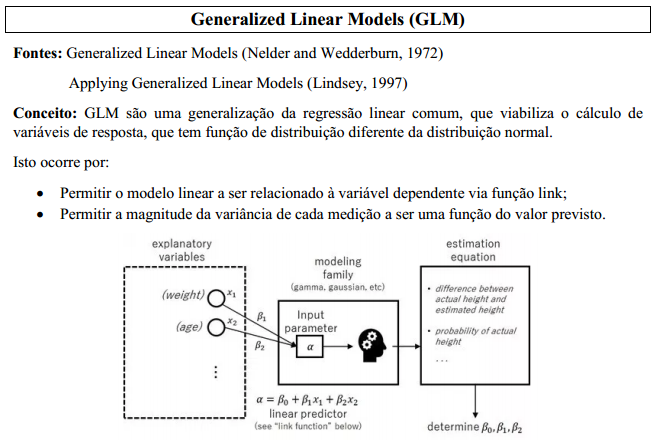

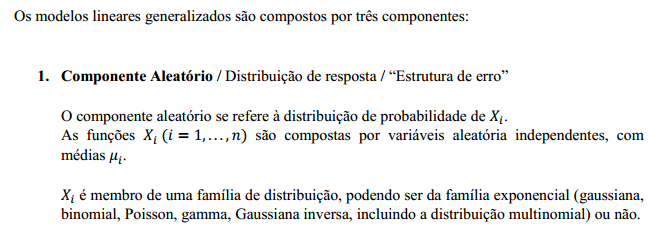

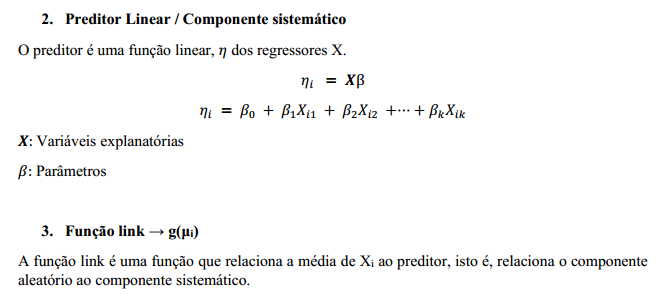

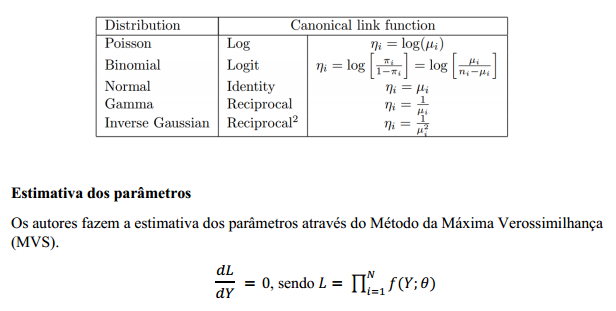

In [950]:
#A biblioteca do statsmodel tem um módulo para GLM.
#Atualmente, a biblioteca só trabalha com famílias exponenciais de um parâmetro.

import statsmodels.api as sm

group = Dados2.groupby(pd.Grouper(freq='M'))
group2 = Evaporacao.groupby(pd.Grouper(freq='M'))

# CÁLCULO DOS MÁXIMOS MENSAIS
cont=0
serie4=[]
VazaoMaxMensal = []
ChuvaMaxMensal = []
for g in group:
    serie4.append(pd.to_datetime(g[0]))
    VazaoMaxMensal.append(g[1].vazao.values.max())
    ChuvaMaxMensal.append(g[1].pinhal.values.max())
    cont = cont+1

EvaporacaoMaxMensal = []
for g2 in group2:
    EvaporacaoMaxMensal.append(g2[1].values.max())

Pinhal = pd.DataFrame(serie4)
Pinhal['Pmax'] = ChuvaMaxMensal
Pinhal['Qmax'] = VazaoMaxMensal
Pinhal['Emax'] = EvaporacaoMaxMensal

Pinhal.columns = ['Data','Pmax','Qmax','Emax']
Pinhal.index = Pinhal.Data
del Pinhal['Data']
vazaomax = Pinhal.Qmax
del Pinhal['Qmax']

Pinhal = sm.add_constant(Pinhal)

gamma_model = sm.GLM(vazaomax, Pinhal, family=sm.families.Gamma())
gamma_results = gamma_model.fit()
print(gamma_results.summary())

C:\Users\RSMatias\Anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:302: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                   Qmax   No. Observations:                   31
Model:                            GLM   Df Residuals:                       28
Model Family:                   Gamma   Df Model:                            2
Link Function:          inverse_power   Scale:                          1.0017
Method:                          IRLS   Log-Likelihood:                -271.92
Date:                Fri, 12 Jul 2019   Deviance:                       92.187
Time:                        02:57:50   Pearson chi2:                     28.0
No. Iterations:                     8   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.001      2.011      0.044    5.18e-05       0.004
Pmax       -2.697e-05   6.15e-06     -4.382      0.0

In [952]:
poisson_model = sm.GLM(vazaomax, Pinhal, family=sm.families.Poisson())
poisson_results = poisson_model.fit()
print(poisson_results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                   Qmax   No. Observations:                   31
Model:                            GLM   Df Residuals:                       28
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9956.2
Date:                Fri, 12 Jul 2019   Deviance:                       19661.
Time:                        02:58:25   Pearson chi2:                 2.22e+04
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1515      0.030    207.494      0.000       6.093       6.210
Pmax           0.0201      0.000    102.300      0.0

In [911]:
#CAPÍTULO 12 – ANÁLISE DE SÉRIES TEMPORAIS
    
date_sart_2 = pd.to_datetime('01/10/2003',dayfirst=True)
date_end_2 = pd.to_datetime('30/04/2006',dayfirst=True)

#  Exemplo de agrupamento: Cálculo do ano hidrológico

#Objetivo para exemplo: Avaliar se existe relação entre vazão e tempo transcorrido.
#1. Calcular o tempo transcorrido de acordo com o index
#2. Realizar a regressão linear
pinhal['Data'] = pinhal.index

t=[]
tempo=[]
tempo.append(0)
t.append(0)

for i in range(1,len(pinhal['Data'])):
    t.append(pinhal.Data.iloc[i] - pinhal.Data.iloc[0])
    tempo.append(t[i].days)

pinhal['tempo'] = tempo
formula = 'Q ~ tempo'

model = smf.ols(formula,data=pinhal)
results = model.fit()

print(formula,'\n',results.summary())

Q ~ tempo 
                             OLS Regression Results                            
Dep. Variable:                      Q   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                 0.0008686
Date:                Fri, 12 Jul 2019   Prob (F-statistic):              0.977
Time:                        01:14:11   Log-Likelihood:                -211.46
No. Observations:                  31   AIC:                             426.9
Df Residuals:                      29   BIC:                             429.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.2527     80.467      3.

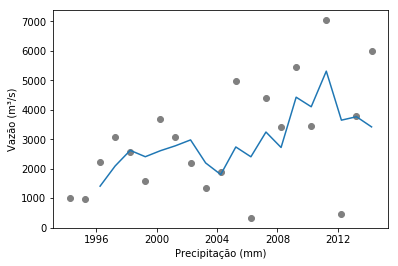

In [945]:
#  12.4  Moving averages

# Componentes de uma série temporal:
# • Tendência: comportamento persistente; → 𝑅𝑒𝑔𝑟𝑒𝑠𝑠ã𝑜
# • Sazonalidade: variação periódica;
# • Ruído: variação aleatória.

# Problema: tendência não ser uma função simples
# Solução: Média móvel, que divide a série em Janelas
# Aplicação: Fazer a média dos dados do rio pelotas
# Janela: 3 meses


plt.scatter(serie3['Q'].index, serie3['Q'],color='grey')
plt.xlabel('Precipitação (mm)')
plt.ylabel('Vazão (m³/s)')

rolling_mean = serie3['Q'].rolling(window=3).mean()
plt.plot(rolling_mean)

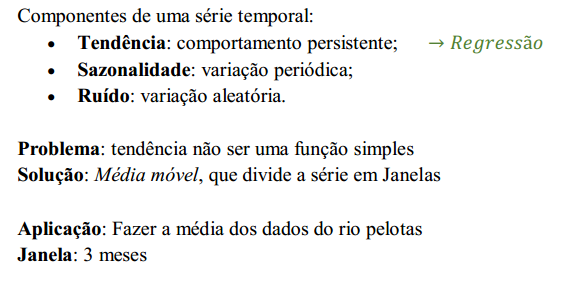

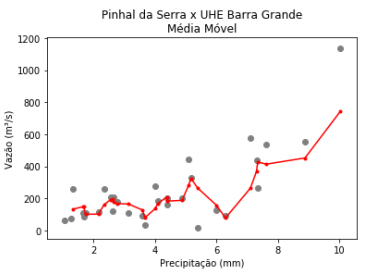

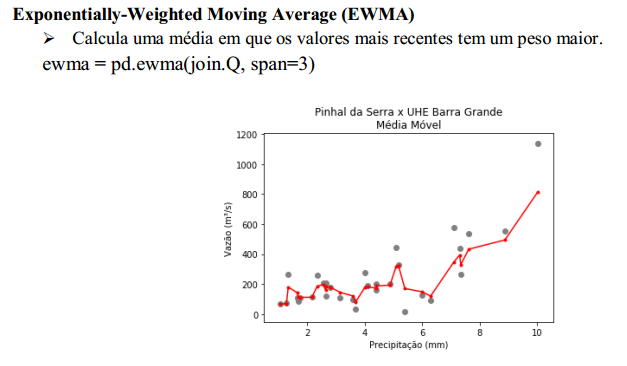

VALORES AUSENTES
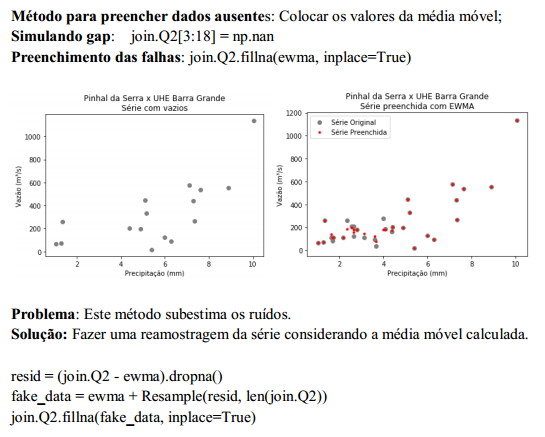

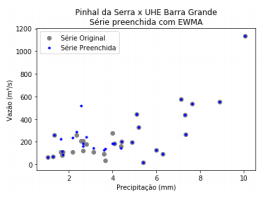

In [ ]:
#  Chapter 13  Survival analysis
#Função de sobrevivência

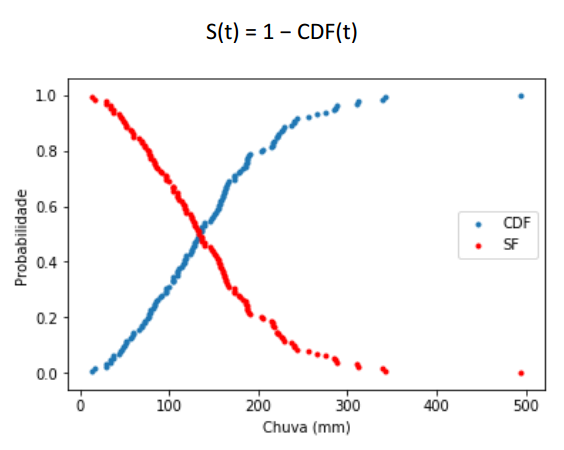

Função de perigo
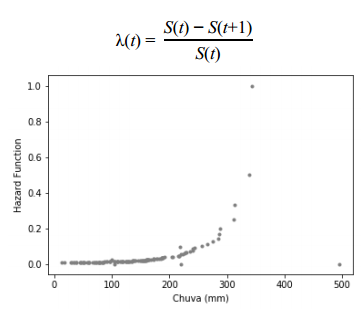